In [1]:
from lensid.utils.ml_utils import *

2022-01-11 03:36:16.195467: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/vpl/2021.6.0/lib:/opt/intel/oneapi/tbb/2021.4.0/env/../lib/intel64/gcc4.8:/opt/intel/oneapi/mkl/2021.4.0/lib/intel64:/opt/intel/oneapi/itac/2021.4.0/slib:/opt/intel/oneapi/ippcp/2021.4.0/lib/intel64:/opt/intel/oneapi/ipp/2021.4.0/lib/intel64:/opt/intel/oneapi/dnnl/2021.4.0/cpu_dpcpp_gpu_dpcpp/lib:/opt/intel/oneapi/debugger/10.2.4/gdb/intel64/lib:/opt/intel/oneapi/debugger/10.2.4/libipt/intel64/lib:/opt/intel/oneapi/debugger/10.2.4/dep/lib:/opt/intel/oneapi/dal/2021.4.0/lib/intel64:/opt/intel/oneapi/compiler/2021.4.0/linux/lib:/opt/intel/oneapi/compiler/2021.4.0/linux/lib/x64:/opt/intel/oneapi/compiler/2021.4.0/linux/lib/emu:/opt/intel/oneapi/compiler/2021.4.0/linux/lib/oclfpga/host/linux64/lib:/opt/intel/oneapi/compiler/2021

In [2]:
df_ul_qts=pd.read_csv('/home/srashti.goyal/lensid_runs/subthreshold/ML_1p0_AnalyticalPsd_sub_unlensed/data/dataframes/unlensed_super_sub_test_QTs_kaggle.csv')
df_ul_sky=pd.read_csv('/home/srashti.goyal/lensid_runs/subthreshold/ML_1p0_AnalyticalPsd_sub_unlensed/data/dataframes/unlensed_super_sub_test_sky.csv')

In [3]:
df_ul_qts.tail()

,Unnamed: 0,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1
1186994,1186994,sub_1181,670316500.000000000-340633,0,0.277847,8073.290527,0.118410,5645.949219,0.028431,7167.754395,0.105324,5242.676270,0.117527,7082.952148,0.105392,4683.276367
1186995,1186995,sub_1182,670316500.000000000-340633,0,0.643665,7731.746582,0.113599,5348.901367,0.472637,7446.173828,0.111387,5333.762695,0.188858,7036.500000,0.105043,4495.964355
1186996,1186996,sub_1183,670316500.000000000-340633,0,0.279637,7717.589355,0.113649,5593.905762,0.023678,6979.604004,0.104333,4786.351562,0.130312,7136.179688,0.105223,4921.461914
1186997,1186997,sub_1184,670316500.000000000-340633,0,0.721590,7579.495117,0.116073,4984.937988,0.040061,7165.028320,0.106292,4749.762695,0.988412,7479.162109,0.111728,5064.059570
1186998,1186998,sub_1185,670316500.000000000-340633,0,0.554862,7626.363281,0.113989,4959.791016,0.048475,7524.823242,0.110628,5459.312500,0.092968,6844.000977,0.102704,4437.671875


In [4]:
df_l_qts=pd.read_csv('/home/srashti.goyal/lensid_runs/subthreshold/ML_1p0_AnalyticalPsd_super_sub/data/dataframes/lensed_QTs_kaggle.csv')
df_l_sky=pd.read_csv('/home/srashti.goyal/lensid_runs/subthreshold/ML_1p0_AnalyticalPsd_super_sub/data/dataframes/lensed_sky.csv')

In [5]:
df_l_qts.tail()

,Unnamed: 0,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1
433,433,super_sub_441_0,super_sub_441_1,1,0.926335,7913.766602,0.115051,5195.4540,0.955467,7160.700684,0.106515,5366.1380,0.936383,8088.309082,0.118573,5649.2925
434,434,super_sub_442_0,super_sub_442_1,1,0.999219,7540.264648,0.111093,4752.0000,0.949603,7228.031738,0.108122,5090.0040,0.275770,7211.458008,0.106251,4786.5176
435,435,super_sub_443_0,super_sub_443_1,1,0.955724,8193.957031,0.117683,4748.1300,0.792465,7439.778809,0.109160,4307.8296,0.700635,6800.683594,0.106565,4285.8022
436,436,super_sub_444_0,super_sub_444_1,1,0.973118,6973.681641,0.102159,6013.3276,0.969778,7504.561523,0.110103,4766.9883,0.979157,7444.046875,0.107230,5144.1816
437,437,super_sub_445_0,super_sub_445_1,1,0.802592,7756.002930,0.111031,4711.5770,0.992556,7599.792969,0.114755,4799.5650,0.359769,7636.083008,0.110752,4454.8457


In [6]:
df_l_sky.tail()

,Unnamed: 0,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq
433,433,super_sub_441_0,super_sub_441_1,1,0.924552,0.007455,0.010280,0.057642
434,434,super_sub_442_0,super_sub_442_1,1,1.512949,0.012199,0.112353,0.082786
435,435,super_sub_443_0,super_sub_443_1,1,69.916233,0.563726,10.068280,0.054020
436,436,super_sub_444_0,super_sub_444_1,1,0.857812,0.006916,0.011188,0.082577
437,437,super_sub_445_0,super_sub_445_1,1,0.698059,0.005628,0.008647,0.048581


### Test the existing lensid models trained on super super pairs

In [7]:
df_test_qts = pd.concat([df_l_qts,df_ul_qts],ignore_index = True).sample(frac = 1).reset_index(drop = True)

In [8]:
df_test_sky = pd.concat([df_l_sky,df_ul_sky],ignore_index = True).sample(frac = 1).reset_index(drop = True)

In [9]:
xgb_sky = joblib.load('/home/srashti.goyal/lensid/saved_models/XGBsky_0.pkl')
xgb_qts = joblib.load('/home/srashti.goyal/lensid/saved_models/XGBQT_0.pkl')

In [10]:
df_test_qts = predict_xgboost_dense_qts(df_test_qts,xgb_qts)
df_test_sky = XGB_predict(df_test_sky,xgb_sky)

In [11]:
df_test_sky.tail()

,Unnamed: 0,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,xgb_pred_bayestar_skymaps
1187432,93666,sub_1080,636738500.000000000-273477,0,8.681774e-07,7.000013e-09,4.179068e-07,0.276651,0.000002
1187433,800035,sub_1184,672973500.000000000-345947,0,5.710902e-01,4.604634e-03,3.225090e-02,0.131247,0.000043
1187434,441360,sub_983,594245000.000000000-188490,0,1.304100e+00,1.051481e-02,6.497011e-02,0.120319,0.000774
1187435,848412,sub_894,604609000.000000000-209218,0,6.530398e-01,5.265384e-03,2.006234e-02,0.099890,0.000341
1187436,395113,sub_1029,564252500.000000000-128505,0,6.470263e-01,5.216898e-03,4.232571e-03,0.035397,0.001104


In [12]:
#print((df_test_sky.isnull()).sum())

dense_H1_0 auc = 0.7885
dense_L1_0 auc = 0.7792
dense_V1_0 auc = 0.7278
xgb_dense_QTS_0 auc = 0.8056


/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/lensid/utils/ml_utils.py:864: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


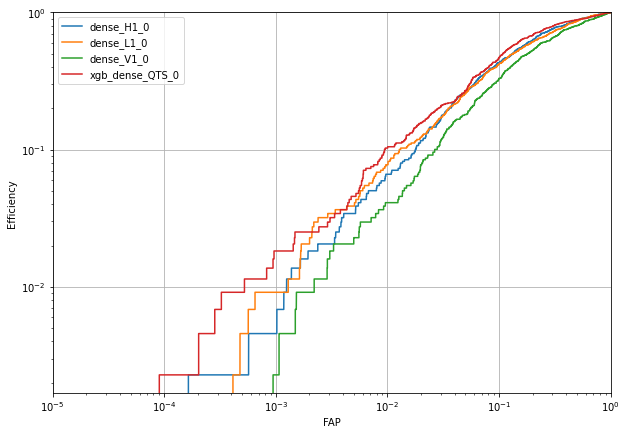

In [13]:
fpps,fig = plot_ROCs(df_test_qts.dropna(),cols=['dense_H1_0', 'dense_L1_0', 'dense_V1_0','xgb_dense_QTS_0'],logy=True)

xgb_pred_bayestar_skymaps auc = 0.9564
bayestar_skymaps_blu auc = 0.9206


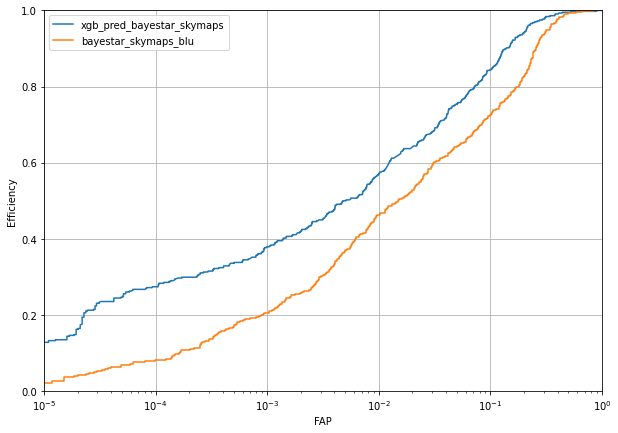

In [14]:
fpps,fig = plot_ROCs(df_test_sky.dropna(),cols=['xgb_pred_bayestar_skymaps','bayestar_skymaps_blu'],logy=False)

In [15]:
df_test_combined = pd.merge(df_test_qts,df_test_sky,on=['img_0','img_1','Lensing'])

In [16]:
df_test_combined['densnet_xgbsky_bayestar_mul_0'] = df_test_combined['xgb_pred_bayestar_skymaps']*df_test_combined['xgb_dense_QTS_0']

xgb_pred_bayestar_skymaps auc = 0.9564
xgb_dense_QTS_0 auc = 0.8056
densnet_xgbsky_bayestar_mul_0 auc = 0.9681


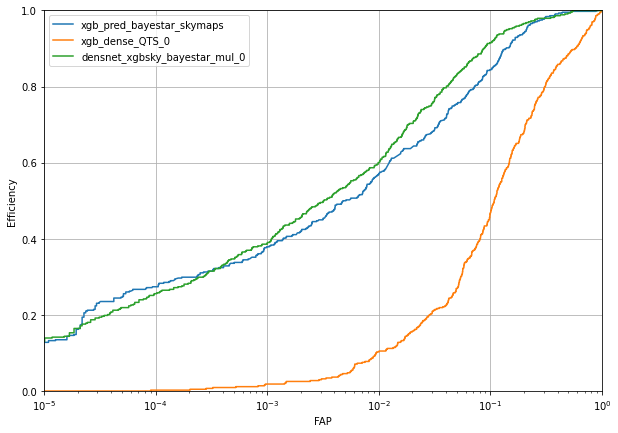

In [17]:
fpps,fig = plot_ROCs(df_test_combined.dropna(),cols=['xgb_pred_bayestar_skymaps','xgb_dense_QTS_0','densnet_xgbsky_bayestar_mul_0'],logy=False)

# check unlensed pairs distribution of super-sub w.r.t sub-sub

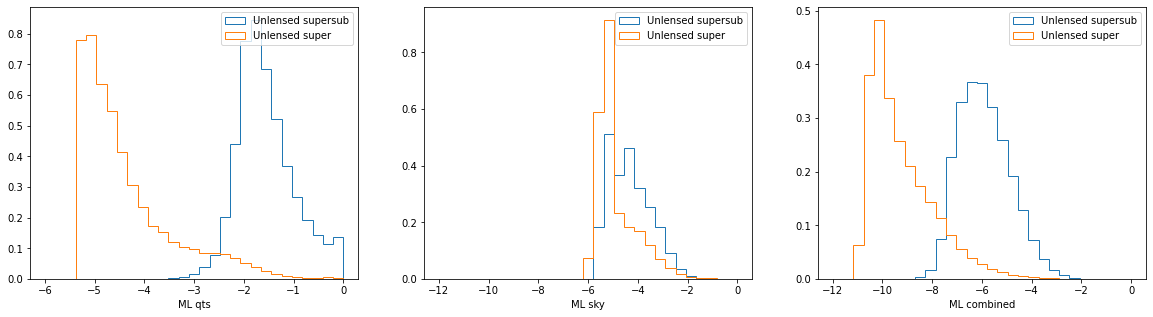

In [26]:
df_test_super_combined=pd.read_csv('/home/srashti.goyal/lensid_runs/ML1p0_kaggle_results/dataframes/ML_combined_kaggle.csv')
plt.figure(figsize=(20,5))
plt.subplot(131)
ml_stat='xgb_dense_QTS_0'
plt.xlabel('ML qts')
bins=np.linspace(-6,0,30)
#plt.ylim(-100,1e3)
df=df_test_combined[df_test_combined['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed supersub', histtype='step',density=True)
df=df_test_super_combined[df_test_super_combined['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed super', histtype='step',density=True)
plt.legend()

plt.subplot(132)
ml_stat='xgb_pred_bayestar_skymaps'
plt.xlabel('ML sky')
bins=np.linspace(-12,0,30)
#plt.ylim(-100,1e3)
df=df_test_combined[df_test_combined['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed supersub', histtype='step',density=True)
df=df_test_super_combined[df_test_super_combined['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed super', histtype='step',density=True)
plt.legend()

plt.subplot(133)
ml_stat='densnet_xgbsky_bayestar_mul_0'
plt.xlabel('ML combined')
bins=np.linspace(-12,0,30)
#plt.ylim(-100,1e3)
df=df_test_combined[df_test_combined['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed supersub', histtype='step',density=True)
df=df_test_super_combined[df_test_super_combined['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed super', histtype='step',density=True)
plt.legend()
plt.show()